# <strong>Parte C:</strong> Plano de fase y estabilidad

### Objetivos:
-Determinar si el problema está bien planteado (existencia, unicidad y estabilidad de soluciones).\
-Calcular al sistema de ecuaciones ordinarias sus puntos críticos y clasificar el sistema según su tipo y estabilidad, verificarlo contruyendo el plano de fase e interpretarlo.

### Circuito RLC con parámetros numéricos:

El sistema de ecuaciones diferenciales ordinarias dado es el siguiente:\
    $$
    \begin{cases}
    \frac{dQ}{dt} = I \\
    \frac{dI}{dt} = -2I - 5Q
    \end{cases}
    $$

#### 1. Calcular punto crítico y clasificar sistema según tipo y estabilidad.

#### **Clasificación del sistema según:**

- **Tipo:** Es un <u>sistema de ecuaciones diferenciales ordinarias</u> ya que se deriva siempre con respecto a una sola variable independiente *t*.
- **Orden:** Es un <u>sistema de orden 1</u> ya que el mayor orden de derivación que aparece es de 1.
- **Linealidad:** Es un <u>sistema lineal</u> ya que las dos ecuaciones diferenciales ordinarias que lo componen son lineales.
- **Homogeneidad:** Es un <u>sistema homogéneo</u> ya que las dos ecuaciones diferenciales ordinarias que lo componen son homogéneas y es un sistema lineal.
- **Estabilidad:** Es un <u>sistema inestable</u> ya que uno de sus autovalores ( $\lambda = 1$ ) tiene parte real positiva.

<h4><strong>Representación matricial:</strong></h4>

$$
\begin{bmatrix}
Q' \\
I'
\end{bmatrix}

=

\begin{bmatrix}
1 & 0 \\
-2 & -5
\end{bmatrix}
*
\begin{bmatrix}
I \\
Q
\end{bmatrix}
$$

Tenemos entonces $$
X' = \begin{bmatrix}
Q' \\
I'
\end{bmatrix}; A = \begin{bmatrix}
1 & 0 \\
-2 & -5
\end{bmatrix}; X = \begin{bmatrix}
I \\
Q
\end{bmatrix} $$

<h4><strong>Resolución del sistema:</strong></h4>
<u>En primer lugar diagonalizamos A para hallar sus eigenvalues:</u>

$$ \det(A-\lambda I) = 0 \\ $$

$$
\left|
\begin{bmatrix}
1 - \lambda && 0 \\
-2 && -5 - \lambda
\end{bmatrix}
\right|
= (-\lambda + 1)(-\lambda -5) = 0
$$

Y por tanto los autovalores de la matriz A son:
$$
\begin{cases}
\lambda_1 = 1\\
\lambda_2 = -5
\end{cases}
$$

<u>Pasamos ahora a buscar los eigenvectors:</u>\
Para $\lambda = 1$:
$$ (A - I) * 
\begin{bmatrix}
x\\
y
\end{bmatrix}
= 0 \\
$$

Luego

$$
\begin{bmatrix}
0 & 0\\
-2 & -6
\end{bmatrix} * 
\begin{bmatrix}
x\\
y
\end{bmatrix}
= 0
$$

Lo que resulta en la ecuación
$$
\begin{cases}
-2x - 6y = 0
\end{cases} \\
$$

O lo que es lo mismo $x = -3y$ y que resulta en el vector

$$
\begin{bmatrix}
-3\\
1
\end{bmatrix}_1
$$

Para $\lambda = -5$:
$$ (A + 5I) * 
\begin{bmatrix}
x\\
y
\end{bmatrix}
= 0 \\
$$

Lo que resulta en
$$
\begin{cases}
x = 0
\end{cases} \\
$$

Y por tanto el vector asociado a este autovalor es:
$$
\begin{bmatrix}
0\\
1
\end{bmatrix}_{-5}
$$

<u>Buscando ahora la solución general:</u>\
$\mathbb{X}'=A \mathbb{X}$ \
En este caso particular, $\mathbb{X}$ es de la forma 
$\mathbb{X} = c_1 k_1 e^{\lambda_1 t} + c_2 k_2 e^{\lambda_2 t} $
Y por tanto:
$$
\mathbb{X} = c_1 *
\begin{bmatrix}
-3\\
1
\end{bmatrix} *
e^{t}
+
c_2 *
\begin{bmatrix}
0\\
1
\end{bmatrix} *
e^{-5t}
$$

<h4><strong>Cálculo del punto crítico:</strong></h4>
Tomando el sistema:

$$
    \begin{cases}
    \frac{dQ}{dt} = I \\
    \frac{dI}{dt} = -2I - 5Q\\
    \end{cases}
$$

Su punto crítico es el punto en el que se cumple:

$$
    \begin{cases}
    \frac{dQ}{dt} = 0 \\
    \frac{dI}{dt} = 0
    \end{cases}
$$

O sea     
$$
    \begin{cases}
    I = 0 \\
    -2I - 5Q = 0 \\
    \end{cases}
$$

$$
    -5Q = 0    \Rightarrow Q = 0 \wedge I = 0\\
$$

Y por tanto el punto crítico del sistema es el (0,0)

#### 2. Construir plano de fase. Explicar cómo deben interpretarse físicamente las trayectorias en términos de la descarga oscilatoria del capacitor en el circuito.

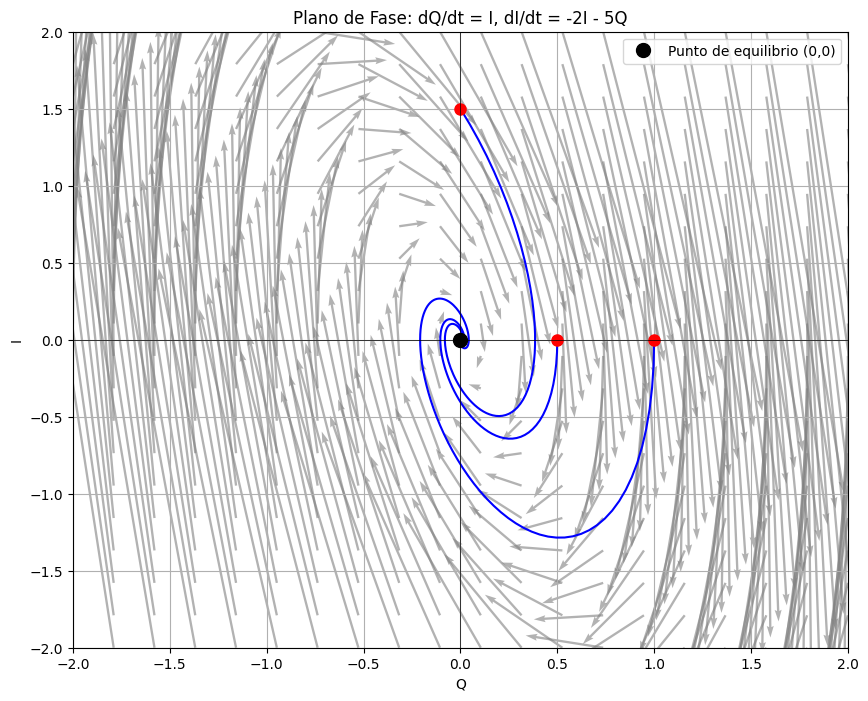

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def sistema(variables, t):
    Q, I = variables
    dQdt = I
    dIdt = -2 * I - 5 * Q
    return [dQdt, dIdt]

Q_min, Q_max = -2, 2
I_min, I_max = -2, 2
n_points = 20

Q_values = np.linspace(Q_min, Q_max, n_points)
I_values = np.linspace(I_min, I_max, n_points)
Q_grid, I_grid = np.meshgrid(Q_values, I_values)

dQ_dt = I_grid
dI_dt = -2 * I_grid - 5 * Q_grid

t = np.linspace(0, 10, 300)

condiciones_iniciales = [
    [1.0, 0],    # Capacitor cargado, sin corriente
    [0.5, 0],    # Capacitor medio cargado
    [0, 1.5],    # Sin carga, con corriente
]

plt.figure(figsize=(10, 8))

plt.quiver(Q_grid, I_grid, dQ_dt, dI_dt, color='gray', alpha=0.6, scale=20)

for cond in condiciones_iniciales:
    sol = odeint(sistema, cond, t)
    plt.plot(sol[:, 0], sol[:, 1], 'b-', linewidth=1.5)
    plt.plot(cond[0], cond[1], 'ro', markersize=8)

#Graficamos el punto crítico
plt.plot(0, 0, 'ko', markersize=10, label='Punto de equilibrio (0,0)')


plt.title('Plano de Fase: dQ/dt = I, dI/dt = -2I - 5Q')
plt.xlabel('Q')
plt.ylabel('I')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(Q_min, Q_max)
plt.ylim(I_min, I_max)
plt.legend()

plt.show()